In [83]:
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.__version__

'2.0.0.dev20230113'

In [49]:
from torchvision import datasets
from torchvision import utils
from torchvision import transforms

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
DEVICE = 'mps'

# Working with pyTorch Tensors

### Define the tensor datatype

In [3]:
x = torch.ones(2, 2)
x

tensor([[1., 1.],
        [1., 1.]])

In [4]:
x.dtype

torch.float32

In [5]:
x = torch.ones(2, 2, dtype=torch.uint8)
x

tensor([[1, 1],
        [1, 1]], dtype=torch.uint8)

### Changing tensor datatype

In [6]:
x = torch.ones(2, 2, dtype=torch.uint8)
x = x.type(torch.float)
x.dtype

torch.float32

### Converting to numpy

In [8]:
x = torch.zeros(3, 3)
y = x.numpy()
y

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

### Converting from numpy

In [12]:
x = np.ones([2, 2])
x = torch.from_numpy(x)
x

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

### Storing tensors on device

In [16]:
x = torch.tensor([[1, 2], [3, 4]])
x = x.to(DEVICE)
x

tensor([[1, 2],
        [3, 4]], device='mps:0')

In [17]:
x = torch.tensor([[1, 2], [3, 4]], device=DEVICE)
x

tensor([[1, 2],
        [3, 4]], device='mps:0')

# Loading and processing the data

### Loading a dataset

In [24]:
path2data = 'data'
path2data = '../torch_in_a_day/data'
train_data = datasets.FashionMNIST(root=path2data, train=True, download=False)
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../torch_in_a_day/data
    Split: Train

In [33]:
X_train, y_train = train_data.data, train_data.targets
X_train.shape, y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [34]:
test_data = datasets.FashionMNIST(root=path2data, train=False, download=False)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../torch_in_a_day/data
    Split: Test

In [35]:
X_test, y_test = test_data.data, test_data.targets
X_test.shape, y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [37]:
# Add new dimension (channel) to the tensor
if len(X_train.shape) == 3:
    X_train, X_test = X_train.unsqueeze(1), X_test.unsqueeze(1)
X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [45]:
# handy function to show tensors as images
def imshow(tensor):
    img = tensor.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img, interpolation='nearest')

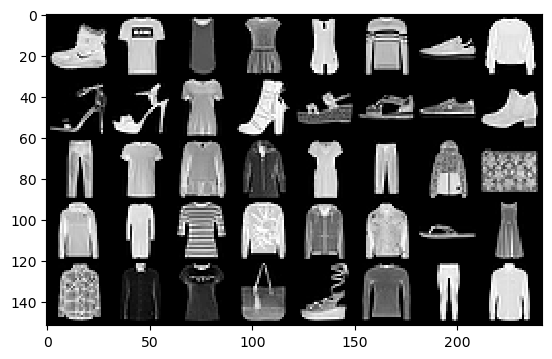

In [48]:
# make a grid o f 40 pictures with padding of 2
X_train_40 = utils.make_grid(tensor=X_train[:40], nrow=8, padding=2)
imshow(X_train_40)

### Data transformation

In [63]:
# define transformations
img_flip = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor()
])

Text(0.5, 1.0, 'flipped')

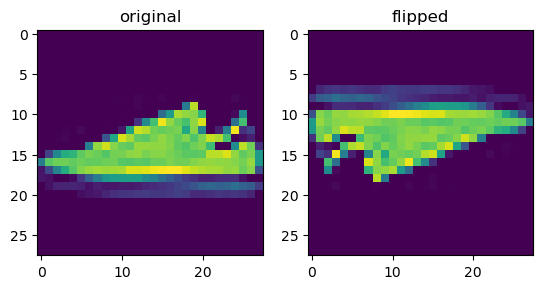

In [77]:
# example of transformation
img_example = train_data[6][0]
img_example_flipped = img_flip(img_example).numpy()

plt.subplot(1, 2, 1)
plt.imshow(img_example)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(img_example_flipped[0])
plt.title('flipped')

### Wrapping Tensors into Dataset

In [80]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [82]:
for X, y in train_dataset:
    print(X.shape, f'label: {y.item()}')
    break

torch.Size([1, 28, 28]) label: 9


### Creating data loaders

In [84]:
train_dl = DataLoader(train_dataset, batch_size=8)
test_dl = DataLoader(test_data, batch_size=8)

for xb, yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([8, 1, 28, 28]) torch.Size([8])
